In [11]:
%run -t numeric_mapping.py
data.head()

Hello World
Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     616 non-null    int64
 1   T Stage                 616 non-null    int64
 2   N Stage                 616 non-null    int64
 3   6th Stage               616 non-null    int64
 4   differentiate           616 non-null    int64
 5   Grade                   616 non-null    int64
 6   A Stage                 616 non-null    int64
 7   Tumor Size              616 non-null    int64
 8   Estrogen Status         616 non-null    int64
 9   Progesterone Status     6

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status,percent regional node positive
0,40,2,1,5,2,2,0,30,1,1,31,0,0.111111
1,68,1,1,4,2,2,0,13,1,1,64,0,0.111111
2,57,3,3,9,2,2,0,70,1,1,42,0,1.000000
3,42,1,3,9,2,2,0,9,0,1,39,0,0.133333
4,67,1,1,4,2,2,0,13,1,1,60,0,0.187500


In [12]:
import seaborn as sns
correlations = data.corr()
correlations
#This step will simply find all the correlations between the different columns in the dataset.

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status,percent regional node positive
Age,1.000000,-0.137842,-0.057319,-0.076839,0.172206,-0.172206,-0.089216,-0.142013,0.117979,0.064478,-0.035164,NaN,0.023267
T Stage,-0.137842,1.000000,0.266244,0.485244,-0.135060,0.135060,0.266610,0.740619,-0.105709,-0.017239,-0.025652,NaN,0.245311
N Stage,-0.057319,0.266244,1.000000,0.924770,-0.156214,0.156214,0.249922,0.272271,-0.084900,-0.037864,-0.092747,NaN,0.698575
6th Stage,-0.076839,0.485244,0.924770,1.000000,-0.157094,0.157094,0.273607,0.411205,-0.099974,-0.027258,-0.080222,NaN,0.660330
differentiate,0.172206,-0.135060,-0.156214,-0.157094,1.000000,-1.000000,-0.013959,-0.162015,0.241049,0.158400,0.087999,NaN,-0.067598
Grade,-0.172206,0.135060,0.156214,0.157094,-1.000000,1.000000,0.013959,0.162015,-0.241049,-0.158400,-0.087999,NaN,0.067598
A Stage,-0.089216,0.266610,0.249922,0.273607,-0.013959,0.013959,1.000000,0.152528,-0.147685,-0.042726,-0.099267,NaN,0.155860
Tumor Size,-0.142013,0.740619,0.272271,0.411205,-0.162015,0.162015,0.152528,1.000000,-0.122553,-0.049350,-0.067828,NaN,0.227595
Estrogen Status,0.117979,-0.105709,-0.084900,-0.099974,0.241049,-0.241049,-0.147685,-0.122553,1.000000,0.472672,0.323343,NaN,-0.020119
Progesterone Status,0.064478,-0.017239,-0.037864,-0.027258,0.158400,-0.158400,-0.042726,-0.049350,0.472672,1.000000,0.355348,NaN,-0.048368


<Axes: >

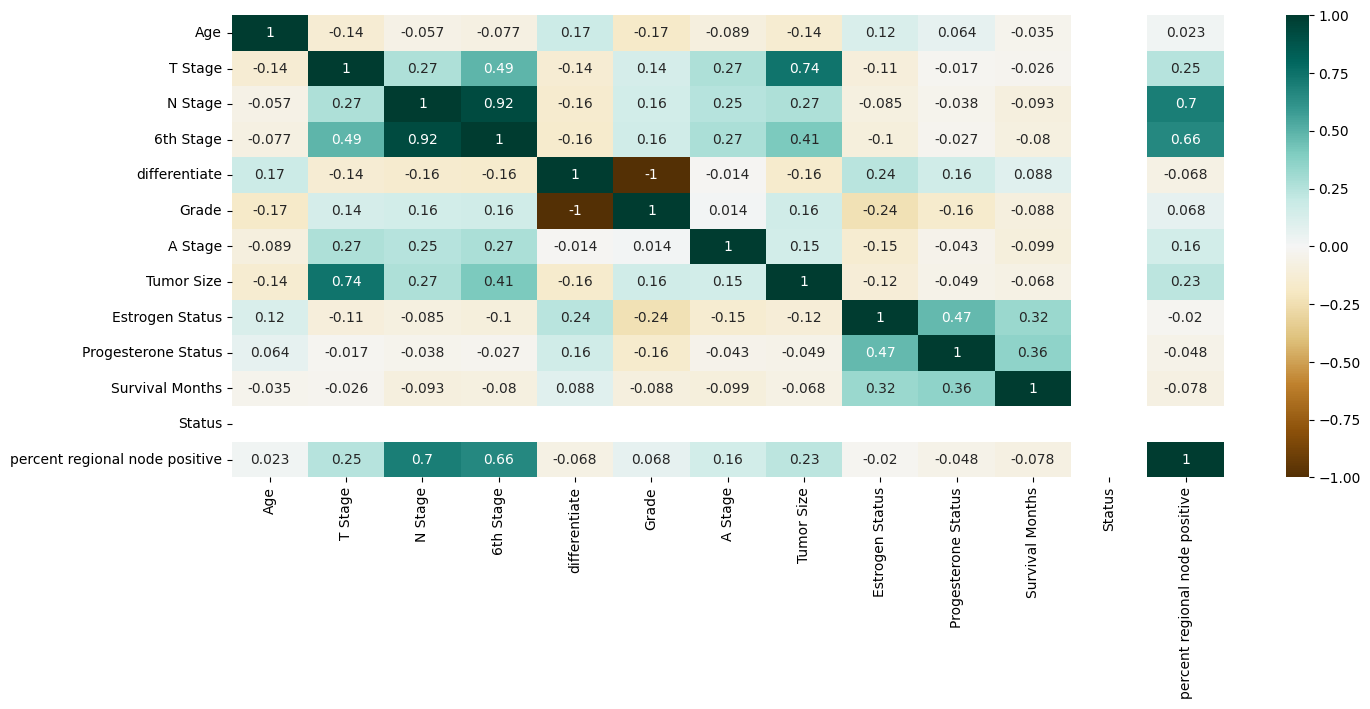

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

sns.heatmap(correlations, annot=True, cmap='BrBG')
# A visualisation of these correlations can be seen in the heatmap below.
#Highly correlated variables include (T stage, Tumor size), (Regional Node Positive, N stage)

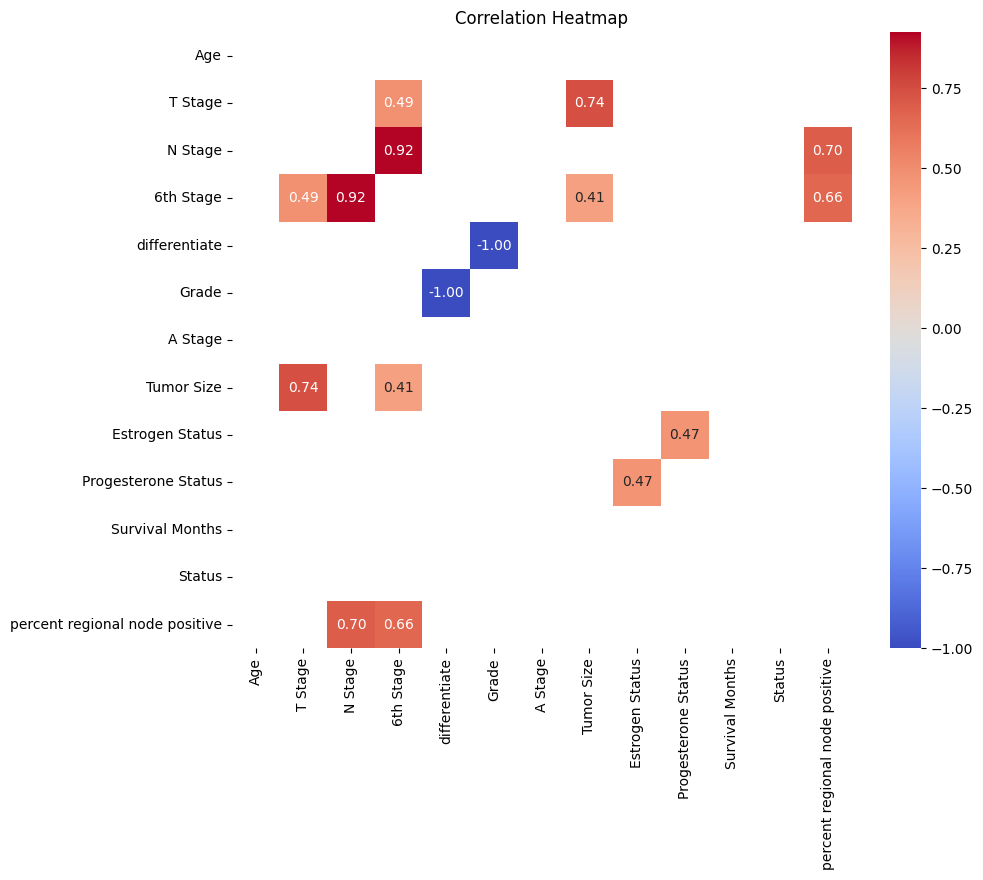

In [14]:
#Find the heavily correlated areas - best to remove one of the two columns?? 
#Or should we be focusing on removing the columns least correlated to survival months?

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with numerical columns
correlations = data.corr()

# Set the threshold for correlation
threshold = 0.4

# Create a mask to display only the upper triangle of the heatmap
mask = ((correlations.abs() < threshold) | (correlations == 1)) | (correlations ==-1)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Heatmap")
plt.show()

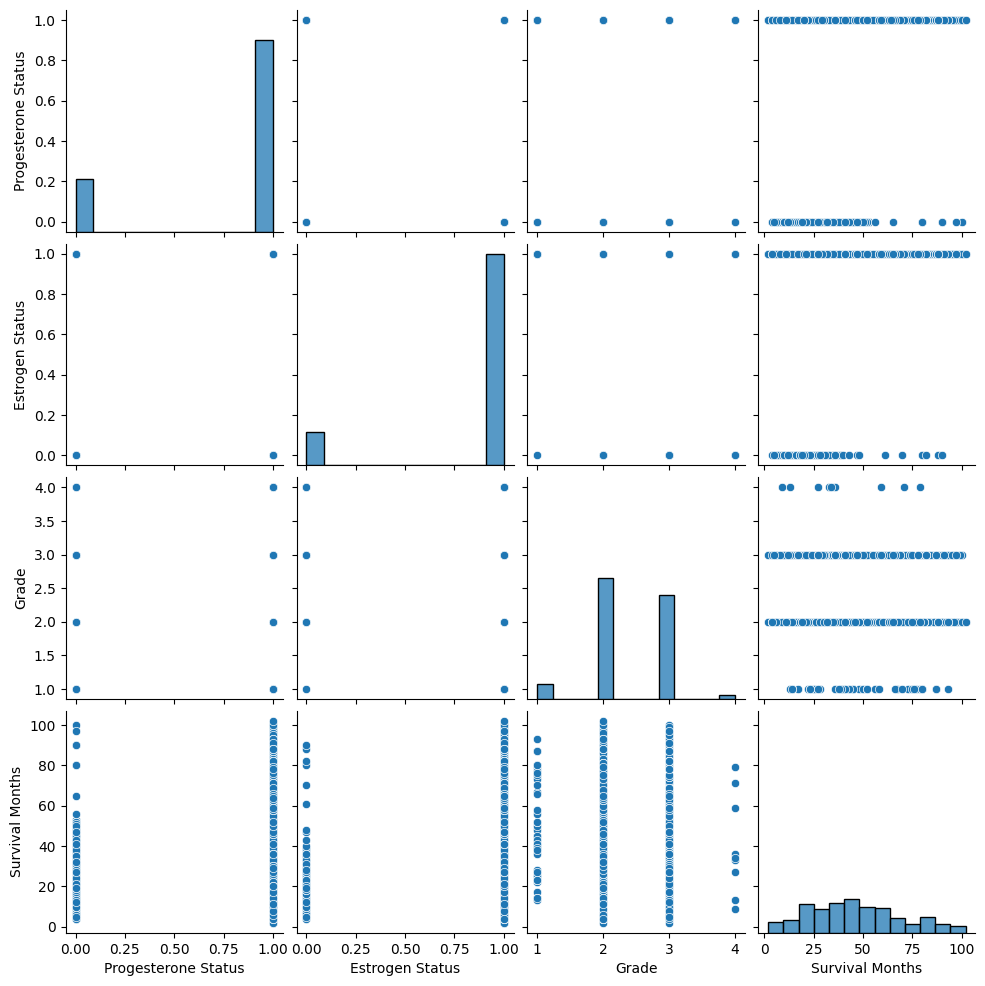

In [15]:
import seaborn as sns

# Select relevant columns for visualization
columns_of_interest = ['Progesterone Status', 'Estrogen Status', 'Grade', 'Survival Months']

# Subset the data with selected columns
data_subset = data[columns_of_interest]

# Create pairplot
sns.pairplot(data_subset)
